<em><sub>This page is available as an executable or viewable <strong>Jupyter Notebook</strong>:</sub></em>
<br/><br/>
<a href="https://mybinder.org/v2/gh/JetBrains/lets-plot/v1.4.0demos2?filepath=docs%2Fexamples%2Fjupyter-notebooks%2Fimage_matrix.ipynb"
   target="_parent"> 
   <img align="left" 
        src="https://mybinder.org/badge_logo.svg">
</a>
<a href="https://nbviewer.jupyter.org/github/JetBrains/lets-plot/blob/master/docs/examples/jupyter-notebooks/image_matrix.ipynb" 
   target="_parent"> 
   <img align="right" 
        src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.png" 
        width="109" height="20">
</a>
<br/>
<br/>

# gg_image_matrix

`gg_image_matrix()` is a utility method helping to combine several images into one graphical object.

The displayed image grid dimensions are determined by the shape of the input 2D ndarray.

Elements of the input 2D ndarray are images specified by a ndarrays with shape (n, m) or (n, m, 3) or (n, m, 4).

For more details see: [image_101.ipynb](https://nbviewer.jupyter.org/github/JetBrains/lets-plot/blob/master/docs/examples/jupyter-notebooks/image_101.ipynb)


In [1]:
import numpy as np
from lets_plot import *

LetsPlot.setup_html()

### Create 2 x 3 array of images

Fill array with the same image.

In [2]:
import matplotlib.image as mpimg
img=mpimg.imread('https://raw.githubusercontent.com/JetBrains/lets-plot/master/docs/examples/images/fisher_boat.png')

rows = 2
cols = 3
X = np.empty([rows, cols], dtype=object)
X.fill(img)

### Display images in 2 x 3 grid


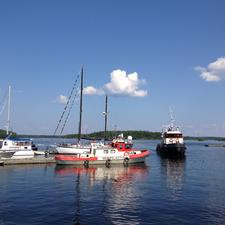
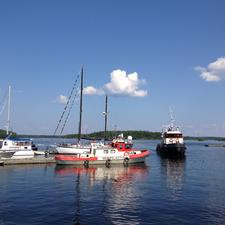
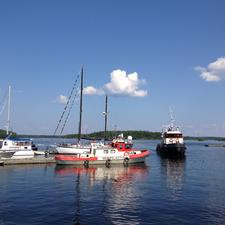
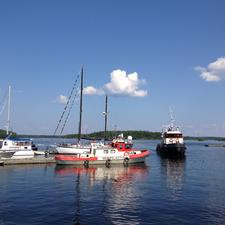
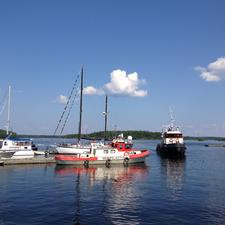
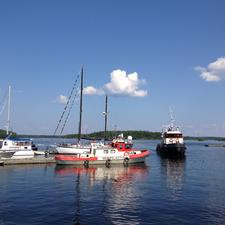

In [3]:
gg_image_matrix(X)

### Images in the grid can be of different sizes


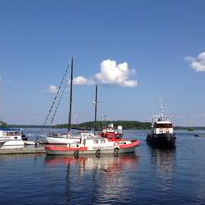
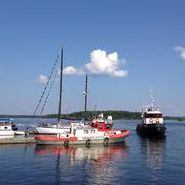
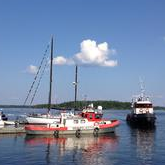
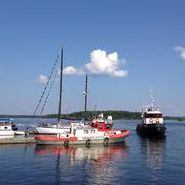
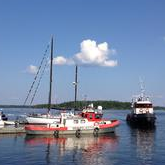
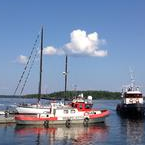

In [4]:
# Lets vary size of images in the matrix
X1 = np.empty([rows, cols], dtype=object)
for row in range(rows):
    for col in range(cols):
        v = (col + row + 1) * 10
        X1[row][col] = img[v:-v,v:-v,:]

gg_image_matrix(X1)

### Normalization in gray-scale image

By default, luminosity images get normalized so that each image have values in the range [0,255].

In [5]:
# First, transform RGB image to grayscale image.
# Select only one `R` channel:
img_gs = img[:,:,0]

This function will alter the range of values in an image (for demo purposes). 

In [6]:
def _degrade(grayscale_img:np.ndarray, v:float):
    # Drop all values less then v
    # Subtract v from all other values 
    h, w = grayscale_img.shape
    for row in range(h):
        for col in range(w):
            if grayscale_img[row][col] < v:
                grayscale_img[row][col] = 0.
            else:
                grayscale_img[row][col] -= v

Now lets fill a 2D array with images, applying `_degrade()` function on each iteration. The last image added is "degraded" the most.

In [7]:
X2 = np.empty([rows, cols], dtype=object)
for row in range(rows):
    for col in range(cols):
        print('[%d][%d] input image range: [%f,%f]' % (row, col, img_gs.min(), img_gs.max()))
        X2[row][col] = img_gs
        img_gs = img_gs.copy()
        _degrade(img_gs, v=.1)



[0][0] input image range: [0.000000,1.000000]
[0][1] input image range: [0.000000,0.900000]
[0][2] input image range: [0.000000,0.800000]
[1][0] input image range: [0.000000,0.700000]
[1][1] input image range: [0.000000,0.600000]
[1][2] input image range: [0.000000,0.500000]


### Display images in grid with normalization (default)


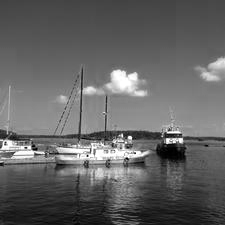
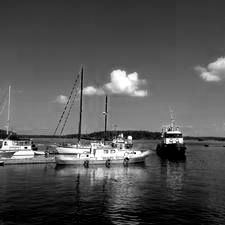
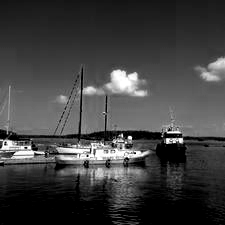
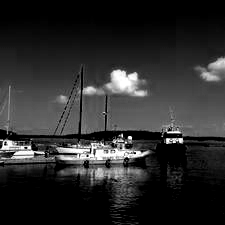
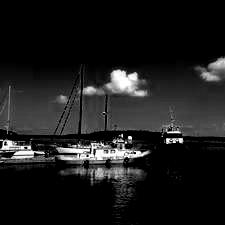
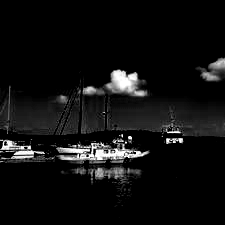

In [8]:
gg_image_matrix(X2)


### Display images in grid with NO normalization

It's important to remember that the input values are expected to be in the range [0, 255].
In our example the values are in the range [0, 1] and without normalization the image is just too dark. 


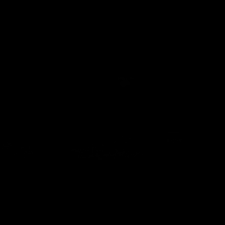

In [9]:
gg_image_matrix(X2, norm=False)

### Display images in grid with NO normalization (fixed)

To be able to see images without normalization we will first map [0, 1] range to [0, 255] range and then "degrade" the images once again.

In [10]:
img_gs255 = np.vectorize(lambda v: v * 255.)(img[:,:,0])
X3 = np.empty([rows, cols], dtype=object)
for row in range(rows):
    for col in range(cols):
        print('[%d][%d] input image range: [%d,%d]' % (row, col, img_gs255.min(), img_gs255.max()))
        X3[row][col] = img_gs255
        img_gs255 = img_gs255.copy()
        _degrade(img_gs255, v=30)


[0][0] input image range: [0,255]
[0][1] input image range: [0,225]
[0][2] input image range: [0,195]
[1][0] input image range: [0,165]
[1][1] input image range: [0,135]
[1][2] input image range: [0,105]



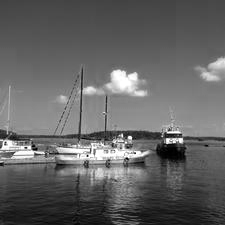
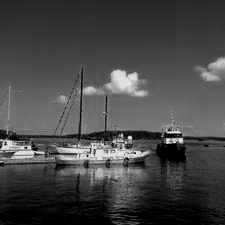
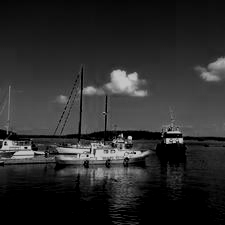
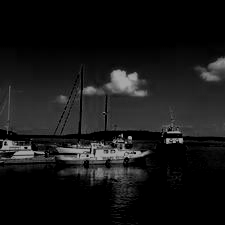
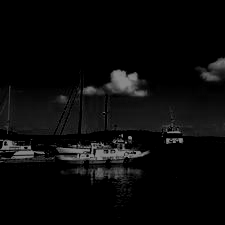
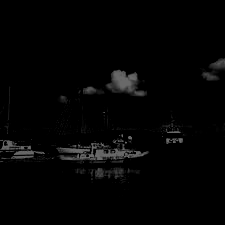

In [11]:
gg_image_matrix(X3, norm=False)

### Scaling image size

In case the image size is too small or too big to show, the displayed dimentions can be changed using the parameter `scale`.

For example,`digits` dataset from `sklearn` package contains very small 8x8 pictures of digits. 

In [12]:
# Load `digits` form sklearn.
from sklearn.datasets import load_digits
digits_bunch = load_digits()
digits_data = digits_bunch.data

In [13]:
# Create 4x4 ndarray containing the first 16 digits in from `digits` dataset. 
cols = 4
rows = 4
X4 = np.empty((rows, cols), dtype=object)
for row in range(rows):
    for col in range(cols):
        i = row * cols + col;
        digit_data = digits_data[i]
        digit_img = digit_data.reshape(8, 8)
        X4[row][col] = digit_img

In [14]:
X4[0][0].shape

(8, 8)

### Scale Up

Each digit image is 8x8 px. Multiply by 15 to see 120x120 px images.

In [15]:
gg_image_matrix(X4, scale=15)

### Scale Down

Use values < 1. to see smaller images.


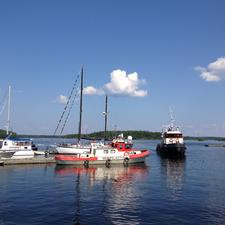
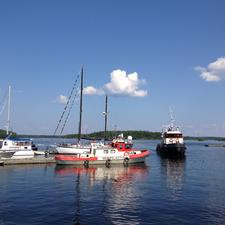
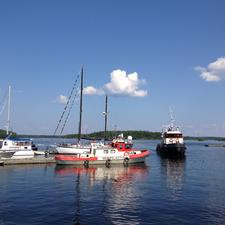
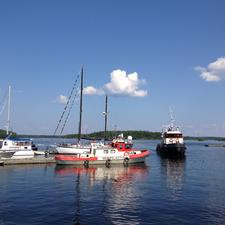
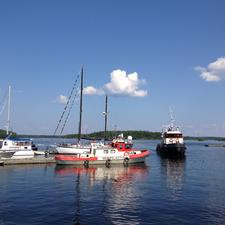
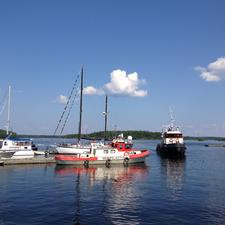

In [16]:
gg_image_matrix(X, scale=.3)